![LogoUC3M](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Acr%C3%B3nimo_y_nombre_de_la_UC3M.svg/320px-Acr%C3%B3nimo_y_nombre_de_la_UC3M.svg.png)

### Machine Learning · Bachelor in Management and Technology
# Tutorial 1: Decision Trees

In [ ]:
# This is for installing model trees, that will be used at the end
!pip install --upgrade linear-tree

# More info about this implementation of model trees
# https://towardsdatascience.com/linear-tree-the-perfect-mix-of-linear-model-and-decision-tree-2eaed21936b7
# https://pypi.org/project/linear-tree/

# Install statsmodels for confidence intervals
!pip install statsmodels

# Training a decision tree for classification

In [ ]:
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Features and target variable
X = iris.data
y = iris.target

# Feature names and target names
feature_names = iris.feature_names
target_names = iris.target_names

# Display the shape of features and target
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
print("Feature names:", feature_names)
print("Target names:", target_names)


Shape of X (features): (150, 4)
Shape of y (target): (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
from sklearn import tree
# Here, we define the type of training method (nothing happens yet)
clf = tree.DecisionTreeClassifier()
# Now, we train (fit) the method on the (X,y) dataset
clf.fit(X, y)
# clf **has been changed** and now contains the trained model

DecisionTreeClassifier()

We can visualize the tree as text

In [ ]:
text_representation = tree.export_text(clf, feature_names=feature_names)
print(text_representation)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



We can also visualize the tree graphically

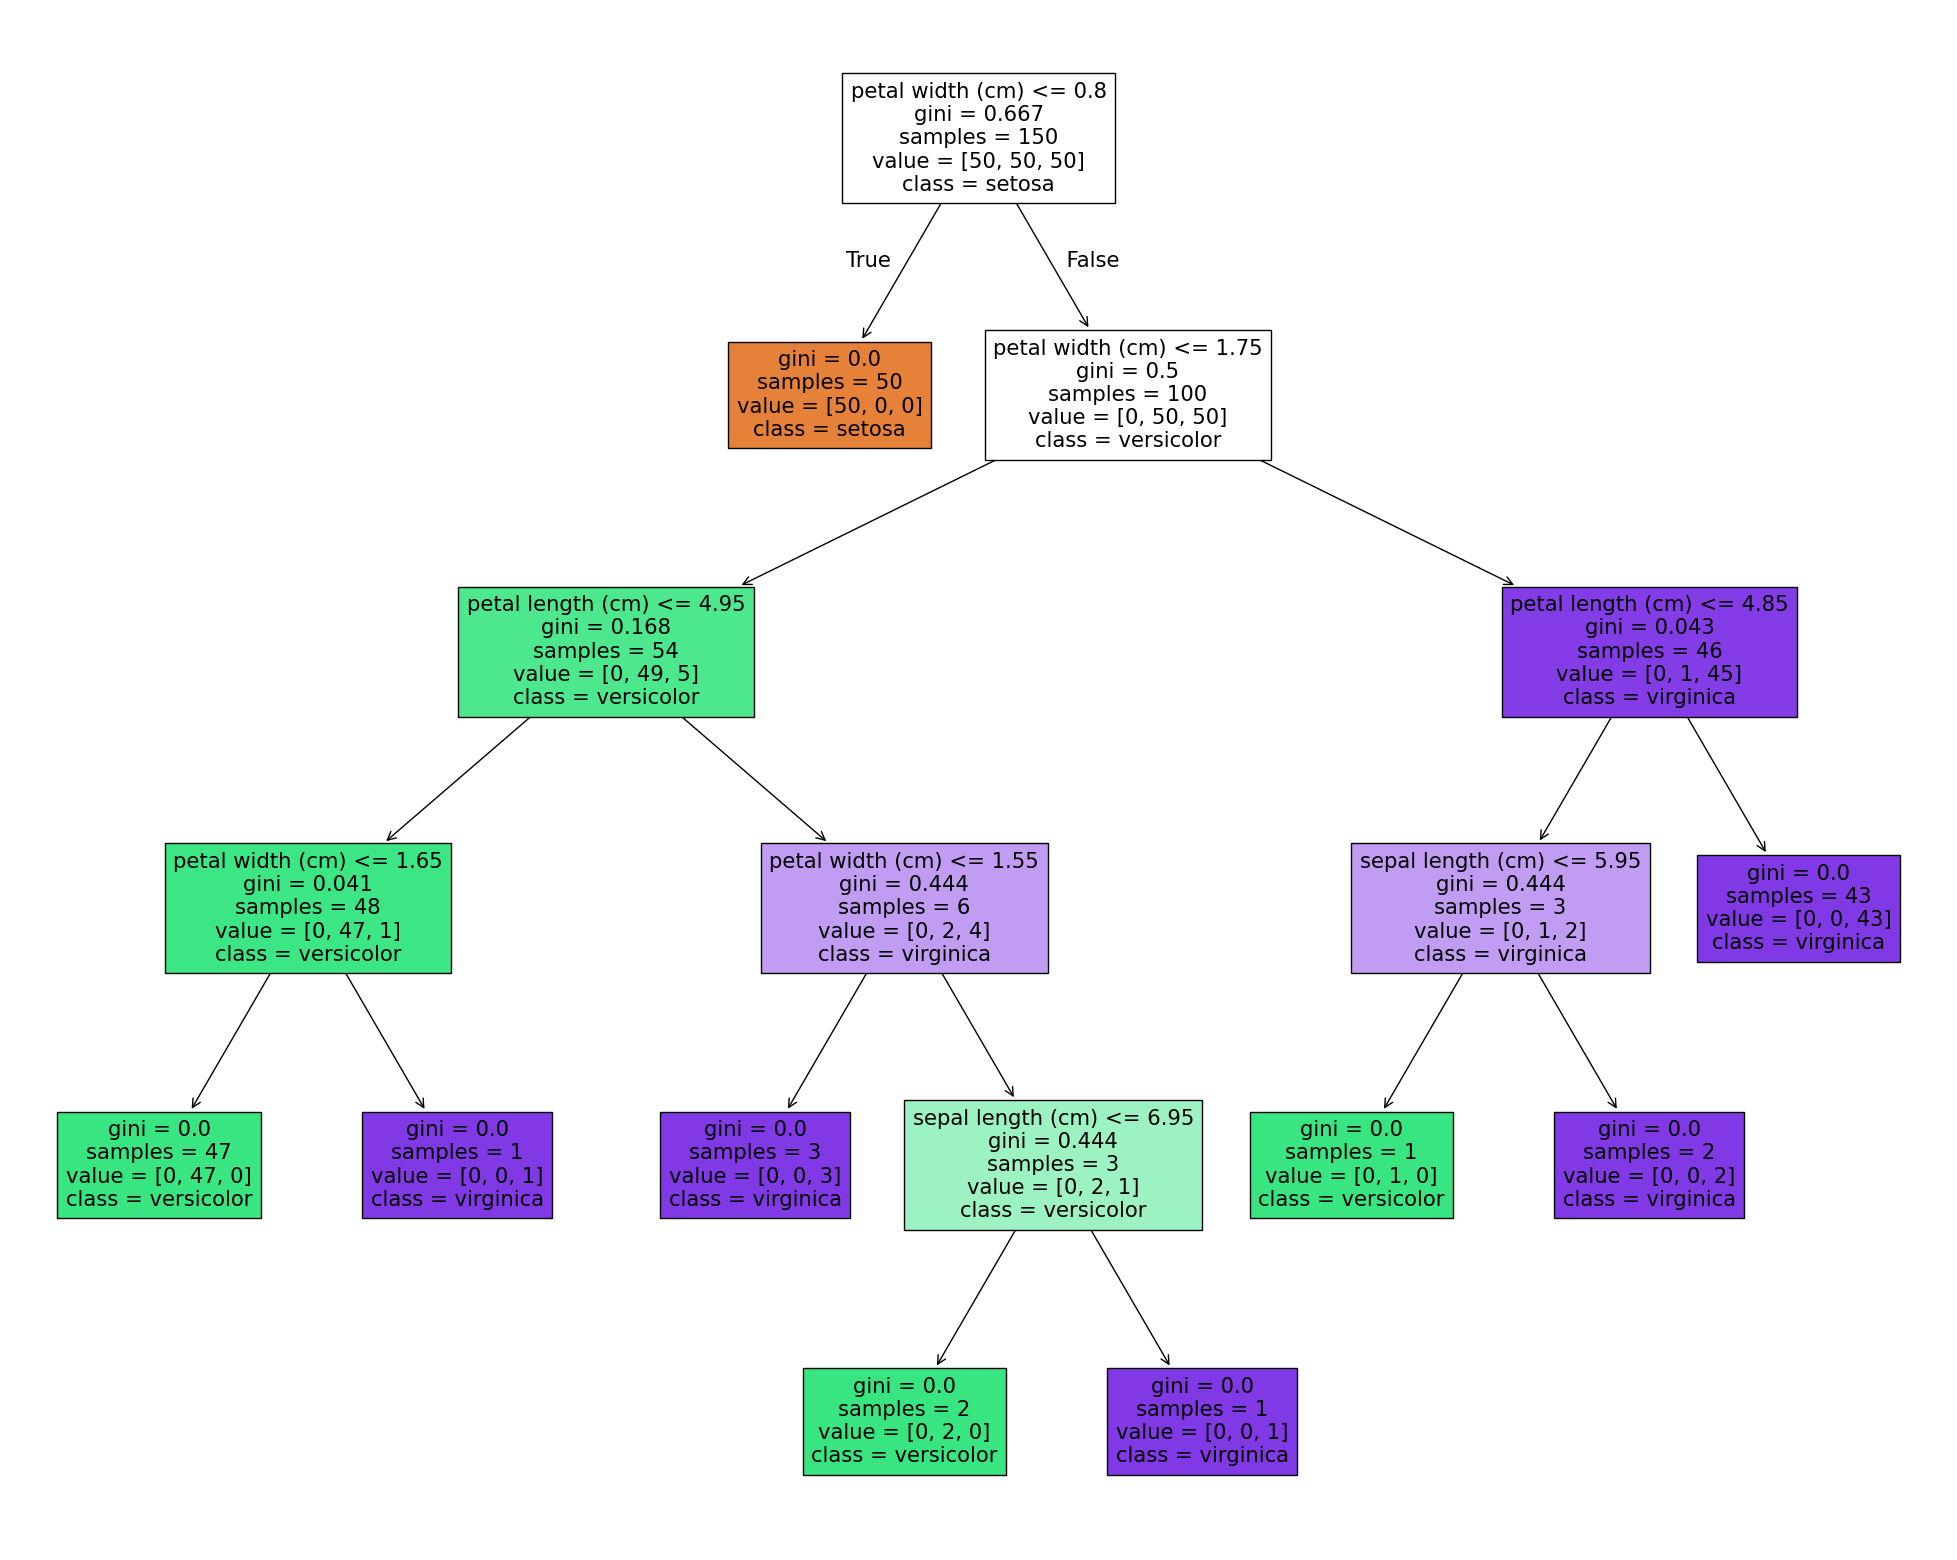

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names = feature_names,
                   class_names= target_names,
                   filled=True)

# Training and evaluating a decision tree with a test set (holdout)

In [ ]:
from sklearn.model_selection import train_test_split

- Now we create the training (X_train, y_train) and testing (X_test, y_test) partitions: 2/3 for training, 1/3 for testing
- Notice the **random_state=42** for reproducibility (important!)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Shape of the training and testing partitions

In [ ]:
print(X_train.shape, y_train.shape) # 100 instances for training
print(X_test.shape, y_test.shape)   # 50 instances for testing

(100, 4) (100,)
(50, 4) (50,)


Let's print the five first training instances

- Now, we train the tree with .fit
- Notice that we use random_state=42 so that the training of the tree is also reproducible (in case that tree training is not deterministic)

In [ ]:
from sklearn import metrics
from sklearn import tree

# Here, we set our model to classification tree
clf = tree.DecisionTreeClassifier(random_state=42)
# Now, we train it
clf.fit(X_train, y_train)
# We can see that the tree is inside
print(tree.export_text(clf))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- feature_2 <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  4.95
|   |   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



Now, we evaluate the tree, by computing predictions on the test set

In [ ]:
y_test_pred = clf.predict(X_test)

- But, in order to evaluate the model on the test partition, we can compute a metric (classification accuracy in this case)
- It is very high (98%)

In [ ]:
from sklearn import metrics
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
print(accuracy_tree)

0.98


However, the 0.98 accuracy is the model evaluation (estimation of performance). We still need to compute the final model (the one that will be sent and used by the company) **using all available data**.

In [ ]:
final_clf = tree.DecisionTreeClassifier(random_state=42)
# Making results reproducible, in case training a tree contains random decisions

# Now, we train it
final_clf.fit(X, y)
# final_clf contains the model that would be used by the company
# Its estimated accuracy is what we computed before (95%)

DecisionTreeClassifier(random_state=42)

Below, you have the complete code

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Here, we set our model to classification tree
clf = tree.DecisionTreeClassifier(random_state=42)
# We train it
clf.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = clf.predict(X_test)
# We compute accuracy
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the tree: {accuracy_tree} ")

# We finally compute the final model with all available data

final_clf = tree.DecisionTreeClassifier(random_state=42)
final_clf.fit(X, y)
final_accuracy = metrics.accuracy_score(y, final_clf.predict(X))
print(f"Accuracy of the final model: {final_accuracy}")

Accuracy of the tree: 0.98 
Accuracy of the final model: 1.0


# Training and evaluating a decision tree with crossvalidation

- KFold creates the training/test crossvalidation folds.
    - shuffle randomly shuffles the data before splitting the folds. We should always do this, unless we have good reasons otherwise
    - random_state makes the shuffling reproducible

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# create a k-fold crossvalidation iterator of k=5 folds
# shuffle = True randomly rearranges the dataframe
# random_state = 42 is for making the folds reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = tree.DecisionTreeClassifier(random_state=42)

scores = cross_val_score(clf, X, y, scoring='accuracy', cv = cv)

print(f"All the accuracies are: {scores}")
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

All the accuracies are: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
And the average crossvalidation accuracy is: 0.95 +- 0.03


- 0.95 is the model evaluation (estimation of performance).
- But the final model has to be trained with all available data.

In [ ]:
final_clf = tree.DecisionTreeClassifier(random_state=42)
# Now, we train it
final_clf.fit(X, y)
# final_clf contains the model that would be used by the company
# Its estimated accuracy is what we computed before

DecisionTreeClassifier(random_state=42)

Below, you have the complete code for crossvalidation evaluation (and also obtaining the final model at the end)

In [ ]:
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score

# create a k-fold crossvalidation iterator of k=5 folds
# shuffle = True randomly rearranges the dataframe
# random_state = 42 is for making the folds reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = tree.DecisionTreeClassifier(random_state=42)

scores = cross_val_score(clf, X, y, scoring='accuracy', cv = cv)

# print(f"All the accuracies are: {scores}")
print(f"The average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

final_clf = tree.DecisionTreeClassifier(random_state=42)
# Now, we train it
final_clf.fit(X, y)
# final_clf contains the model that would be used by the company

The average crossvalidation accuracy is: 0.95 +- 0.03


DecisionTreeClassifier(random_state=42)

# Changing hyperparameters of a decision tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

:Let's see the effect of changing from gini to entropy. We use holdout here. It seems that results are exactly the same.

In [ ]:
# This loop checks what happens with the two criterions
for criterion in ["gini", "entropy"]:
    clf = tree.DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With {criterion}: {accuracy_tree:.2f}")

With gini: 0.98
With entropy: 0.98


Let's see the effects of maximum_depth. "None" represents the maximum possible depth.

In [ ]:
for max_depth in [1,2,3,None]:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With max_depth {max_depth}: {accuracy_tree:.2f}")

With max_depth 1: 0.68
With max_depth 2: 0.98
With max_depth 3: 0.98
With max_depth None: 0.98


It seems that max_depth=2 is enough. Let's visualize a tree with max depth = 2

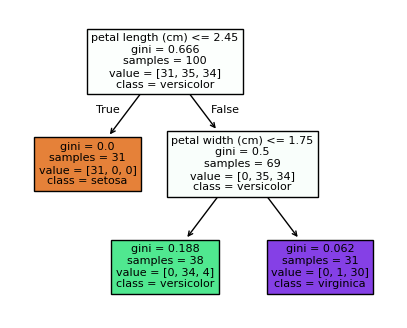

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,4))

clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train,y_train)

_ = tree.plot_tree(clf,
                   feature_names = feature_names,
                   class_names= target_names,
                   filled=True)

Let's see the effects of min_samples_split. 2 is the default.

In [ ]:
for min_samples in [2,10,20,30,100]:
    clf = tree.DecisionTreeClassifier(min_samples_split=min_samples, random_state=42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With min_samples_split {min_samples}: {accuracy_tree:.2f}")

With min_samples_split 2: 0.98
With min_samples_split 10: 0.98
With min_samples_split 20: 0.98
With min_samples_split 30: 0.98
With min_samples_split 100: 0.68


Finally, let's check another hyper-parameter called min_impurity_decrease: this means that a new level of the tree is created only if the information gain (that is, the decrease in entropy or gini) is larger than min_impurity_decrease. It is yet another way of controlling tree depth.

In [ ]:
for min_impurity_decrease in np.linspace(0,2,num=10):
    clf = tree.DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease,
                                      random_state=42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With min_impurity_decrease {min_impurity_decrease}: {accuracy_tree:.2f}")

With min_impurity_decrease 0.0: 0.98
With min_impurity_decrease 0.2222222222222222: 0.98
With min_impurity_decrease 0.4444444444444444: 0.30
With min_impurity_decrease 0.6666666666666666: 0.30
With min_impurity_decrease 0.8888888888888888: 0.30
With min_impurity_decrease 1.1111111111111112: 0.30
With min_impurity_decrease 1.3333333333333333: 0.30
With min_impurity_decrease 1.5555555555555554: 0.30
With min_impurity_decrease 1.7777777777777777: 0.30
With min_impurity_decrease 2.0: 0.30


In [ ]:
import pandas as pd
tennis_df = pd.read_csv("https://raw.githubusercontent.com/emiliomartin84/Machine_Learning_Uc3m/main/Data/tennis.txt", sep=",")

**With** this dataset is very small, so we can visualize it whole

In [ ]:
tennis_df

,Sky,Temperature,Humidity,Windy,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


# **Exercise (long):** Go back to the KNN tutorial and use a ColumnTransformer to fit a tree on the training set. Then use the trained model for making predictions on the testing set, and finally compute the testing accuracy.

# Regression trees with holdout evaluation

Let's load the California Housing dataset and check its description. Its data about housing prices depending on the characteristics of the zone**

In [27]:
from sklearn.datasets import fetch_california_housing

# Fetch the California Housing dataset
california_housing = fetch_california_housing()

# Features and target variable
X = california_housing.data
y = california_housing.target

# Feature names
feature_names = california_housing.feature_names

# Display the shape of features and target
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
print("Feature names:", feature_names)


Shape of X (features): (20640, 8)
Shape of y (target): (20640,)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


The main change is that we use a DecisionTreeRegressor and the metric is now RMSE

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import numpy as np

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Here, we set our model to classification tree
regr = tree.DecisionTreeRegressor(random_state=42)

# We train it
regr.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = regr.predict(X_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f"RMSE of the tree: {rmse_tree}")

# We would have to compute the final model with all available data (X,y)
# Not done here

RMSE of the tree: 0.7389833060012664


Is it better than a trivial regressor?

In [29]:
from sklearn.dummy import DummyRegressor
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train, y_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_test, regr_mean.predict(X_test)))

print(f"RMSE of the tree: {rmse_tree}")
print(f"RMSE of dummy(mean): {rmse_mean}")
print(f"RMSE ratio tree/dummy(mean): {rmse_tree/rmse_mean}")

RMSE of the tree: 0.7389833060012664
RMSE of dummy(mean): 1.15439409553007
RMSE ratio tree/dummy(mean): 0.6401482031679511


The tree has more than 10 levels and it is very hard to visualize. Let's visualize one with only two levels

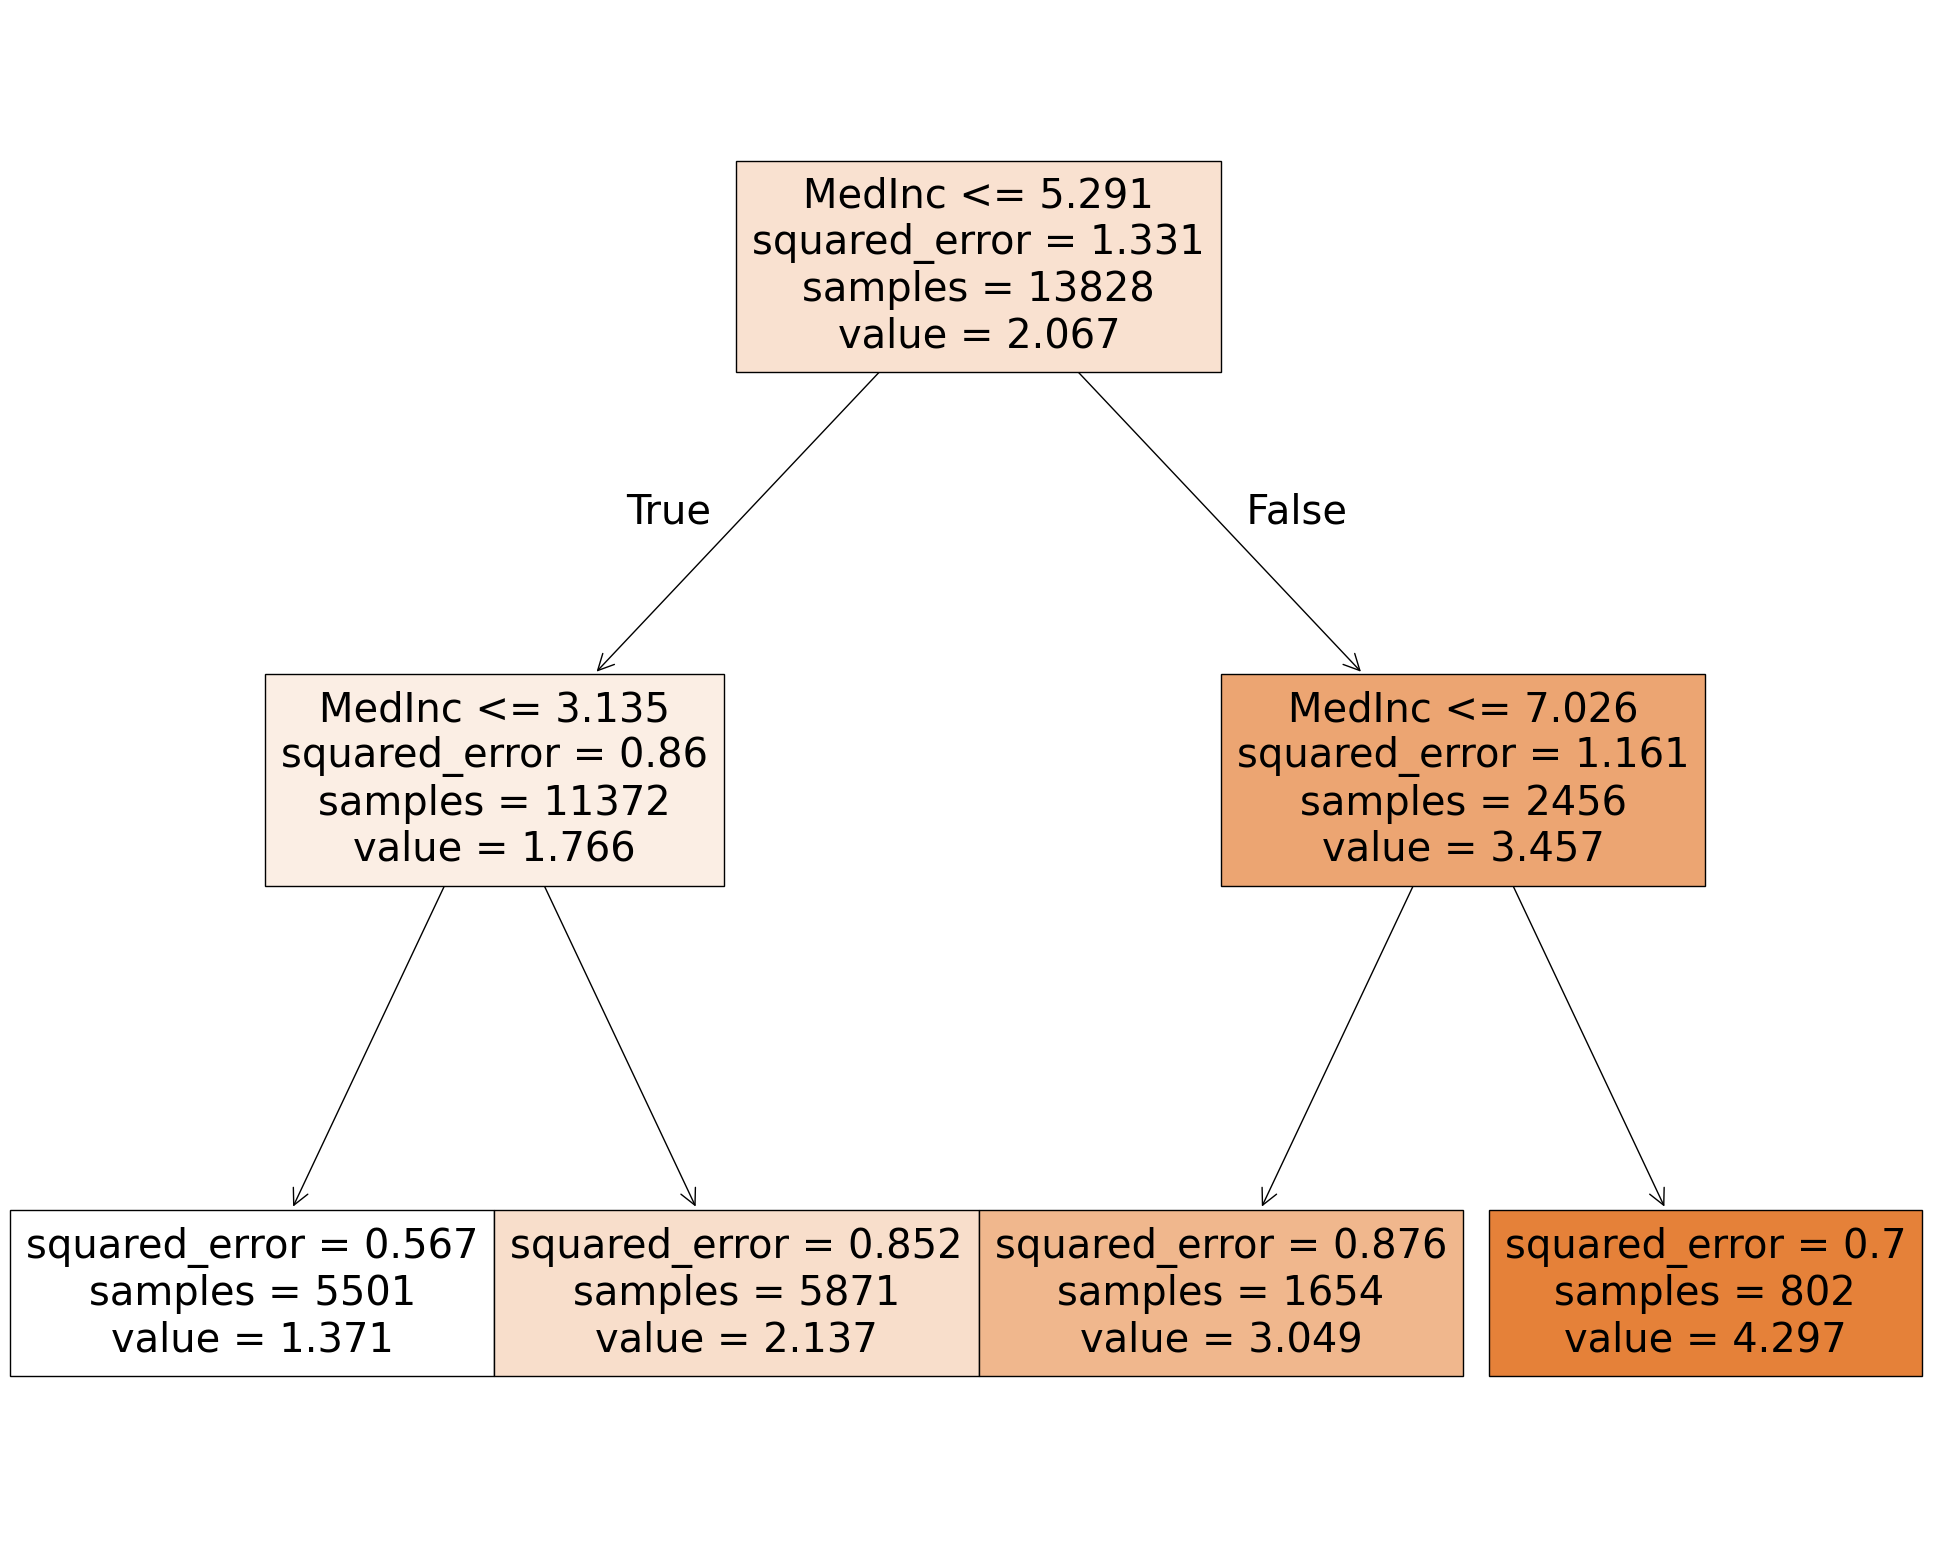

In [30]:
regr = tree.DecisionTreeRegressor(max_depth=2, random_state=42)

# We train it
regr.fit(X_train, y_train)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(regr,
                   feature_names = feature_names,
                   filled=True)

**Now we train model trees (for regression)**

In [32]:
# More info about this implementation of model trees
# https://towardsdatascience.com/linear-tree-the-perfect-mix-of-linear-model-and-decision-tree-2eaed21936b7
# https://pypi.org/project/linear-tree/

# IMPORTANT: This implementation of Model Trees is able to deal with Categorical Features (whose values are encoded as integers 0,1,2, ...)
# in order to use categorical features, the parameter categorical_features must be used.

In [33]:
!pip install --upgrade linear-tree

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regr = LinearTreeRegressor(base_estimator=LinearRegression())

# We train it
regr.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = regr.predict(X_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f"RMSE of the tree: {rmse_tree}")

# We would have to compute the final model with all available data
# Not done here, only interested on test RMSE

RMSE of the tree: 0.601618300546885


The internal nodes of the model tree below:

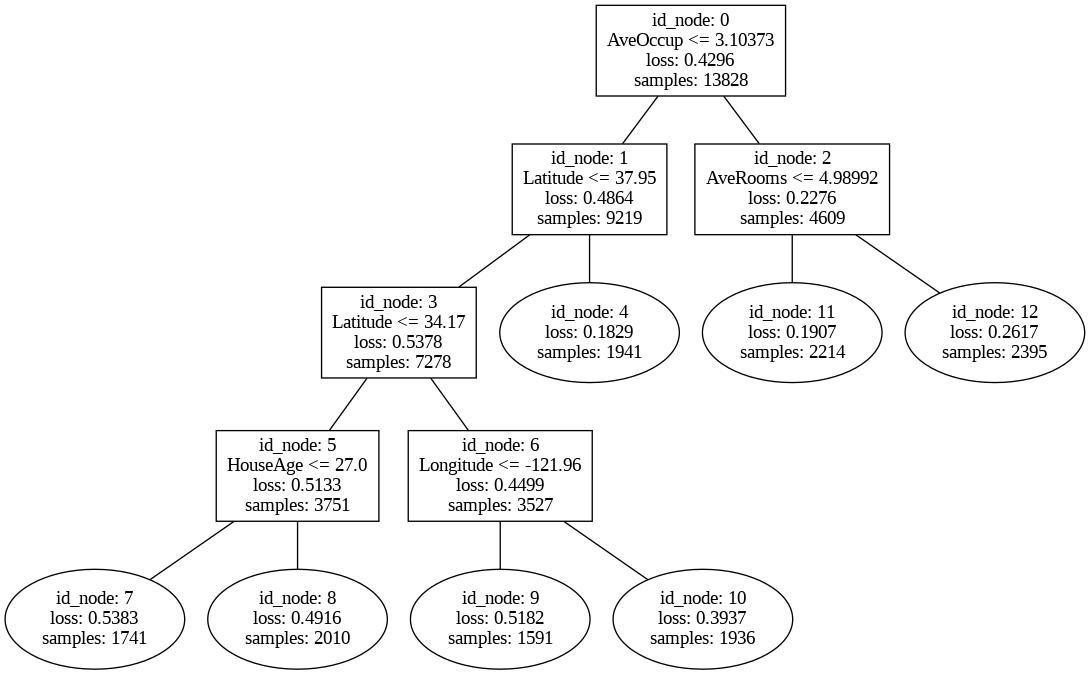

In [35]:
regr.plot_model(feature_names=feature_names)

In order to check the linear models at the leaves, we have to follow a longer process. What follows shows the coefficient of the linear model at node 5.

In [36]:
leaves = regr.summary(feature_names=feature_names, only_leaves=True, max_depth=None)

In [37]:
leaves

{7: {'loss': 0.53832, 'samples': 1741, 'models': LinearRegression()},
 8: {'loss': 0.49163, 'samples': 2010, 'models': LinearRegression()},
 9: {'loss': 0.51824, 'samples': 1591, 'models': LinearRegression()},
 10: {'loss': 0.39367, 'samples': 1936, 'models': LinearRegression()},
 4: {'loss': 0.18285, 'samples': 1941, 'models': LinearRegression()},
 11: {'loss': 0.19074, 'samples': 2214, 'models': LinearRegression()},
 12: {'loss': 0.26167, 'samples': 2395, 'models': LinearRegression()}}

In [38]:
from pprint import pprint
model_7_coefs = leaves[7]['models'].coef_
model_7_intercept = leaves[7]['models'].intercept_
pprint(list(zip(feature_names, model_7_coefs)))
pprint(f'intercept: {model_7_intercept}')

[('MedInc', 0.3211978),
 ('HouseAge', 0.009533927),
 ('AveRooms', 0.053665258),
 ('AveBedrms', 0.027785428),
 ('Population', 1.2990553e-05),
 ('AveOccup', -0.3423915),
 ('Latitude', -0.28540224),
 ('Longitude', -0.76213783)]
'intercept: -78.72712707519531'


In [39]:
?LinearTreeRegressor